In [0]:
from scipy.stats import expon
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import math

# Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения  F ?

## Задача

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

Time =  0.0007481575012207031


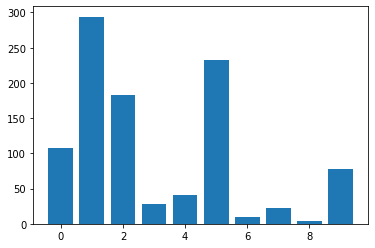

In [33]:
start = time.time()
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
probabilities = [0.12, 0.3, 0.167, 0.024, 0.031,0.23, 0.01, 0.02, 0.008, 0.09]
random = np.random.choice(elements, 1000, p=probabilities)
random_list=list(random)
end = time.time()
print("Time = ", end-start)
plt.bar(np.arange(10), [random_list.count(i) for i in range(10)])
plt.show()

Time =  0.0005590915679931641


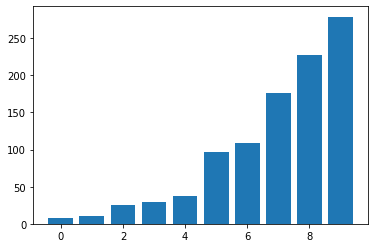

In [34]:
start = time.time()
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
probabilities = [0.12, 0.3, 0.167, 0.024, 0.031,0.23, 0.01, 0.02, 0.008, 0.09]
probabilities.sort()
random = np.random.choice(elements, 1000, p=probabilities)
random_list=list(random)
end = time.time()
print("Time = ", end-start)
plt.bar(np.arange(10), [random_list.count(i) for i in range(10)])
plt.show()

После оптимизации время стало меньше

## Inverse transform method

В следующем предложении заключается идея обратного преобразования :

Если  ξ  имеет равномерное распределение в  [ 0 , 1 ] , тогда  F- 1( ξ)  распределена по закону  F , (Для каких F  это верно?)

## Задача

Смделируйте выборку размера 1000 из распределения  Ех р ( λ ) , Постройте выборочную гистограмму и точный график плотности распределения.

(array([0.73256531, 0.33547383, 0.14788234, 0.07667973, 0.04518627,
        0.01506209, 0.00410784, 0.0068464 , 0.00410784, 0.00136928]),
 array([5.40084068e-04, 7.30850398e-01, 1.46116071e+00, 2.19147102e+00,
        2.92178134e+00, 3.65209165e+00, 4.38240197e+00, 5.11271228e+00,
        5.84302259e+00, 6.57333291e+00, 7.30364322e+00]),
 <a list of 10 Patch objects>)

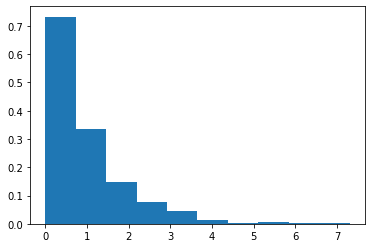

In [35]:
random = np.random.exponential(1,1000)
plt.hist(random,density=True)

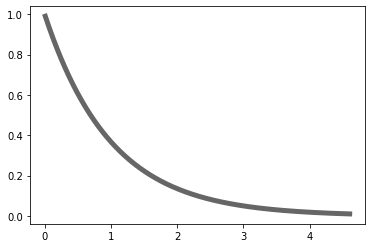

In [36]:
x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 1000)
plt.plot(x, expon.pdf(x), 'blue', lw=5, alpha=0.6, label='Exp pdf', color = "black")

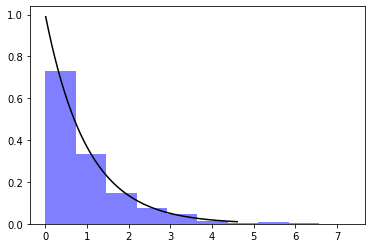

In [37]:
plt.hist(random,density=True, color = "blue", alpha = 0.5)
plt.plot(x, expon.pdf(x), 'black', alpha=1, label='Exp pdf')


## Rejection sampling (Accept-reject method)

Идея заключается в том, чтобы распределить точки, которые следуют нуждающемуся распределению. Картинка иллюстрирует идею символа: /*Здесь картинка*/

## Задача

Обоснуйте, что метод принять-отклонить действительно дает возможность выбора из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиками точной функции плотности.

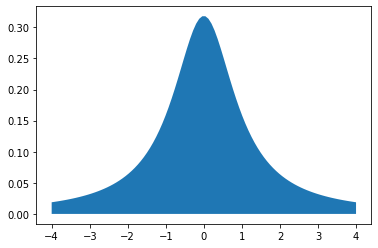

In [41]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x))
plt.show()

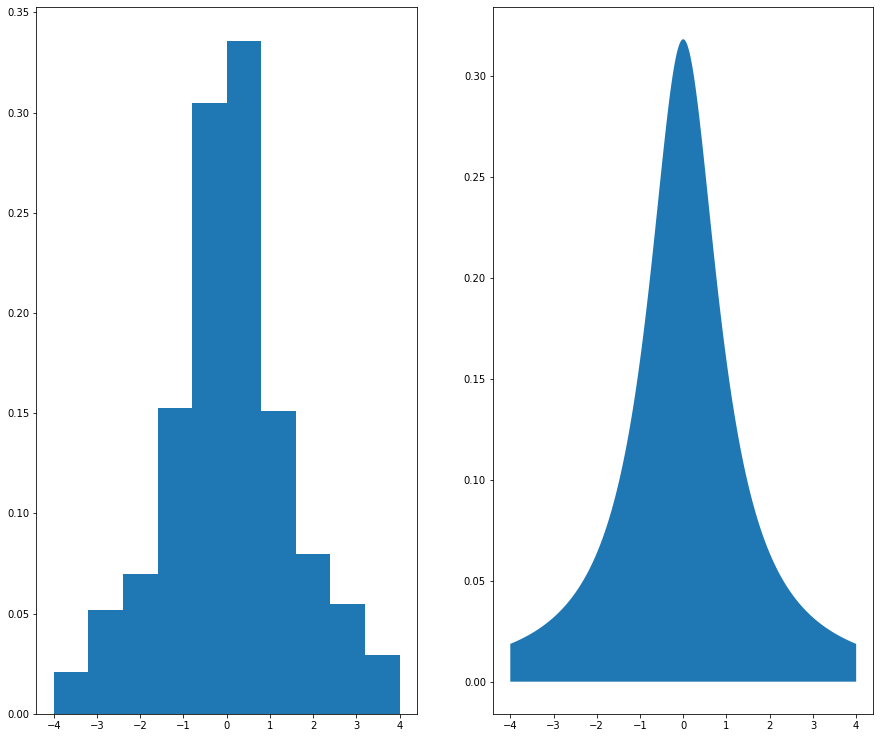

In [42]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 1000)

plt.figure(figsize=(15,13))
plt.subplot(1,2,1)

random = np.random.standard_cauchy(1000)
plt.hist(random,range=(-4,4),density=True)

plt.subplot(1,2,2)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

# Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива - попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

## Задача

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

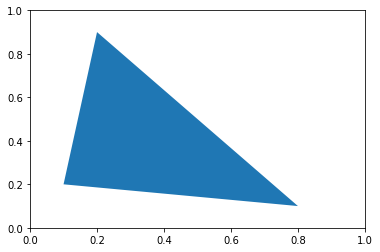

In [43]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

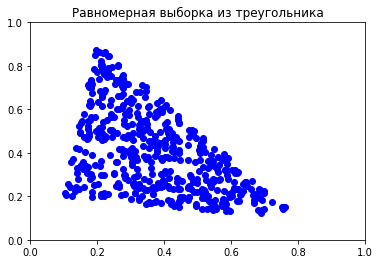

In [44]:
import math

xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])
for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)
a = math.atan2(-1, 7)
x = xrand
xrand = xrand*math.cos(a)-yrand*math.sin(a)+0.1
yrand = x*math.sin(a)+yrand*math.cos(a)+0.2
plt.scatter(xrand, yrand,c='blue')
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Равномерная выборка из треугольника")
plt.show()

## Задача

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора

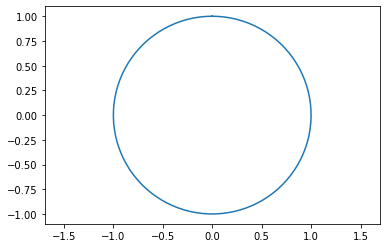

In [46]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

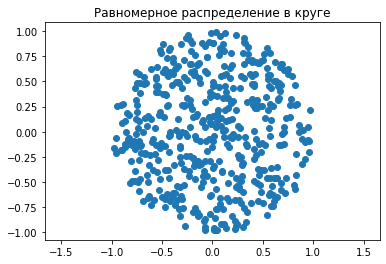

In [47]:
r = np.sqrt(np.random.uniform(0, 1, 500))
phi = np.random.uniform(0, 2*np.pi, 500)
x = r * np.cos(phi)
y = r * np.sin(phi)
plt.scatter(x, y)
plt.title('Равномерное распределение в круге')
plt.axis('equal')
plt.show()

## Задача

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

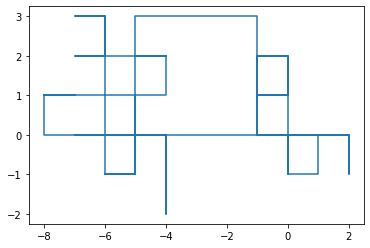

In [57]:

n=100
xindex = np.zeros(100)
yindex = np.zeros(100)
def walk(n):
    xindex = np.random.choice(n, n//2, replace = False)
    yindex = np.random.choice(n, n//2, replace = False)

    x_ = x = np.array([sum([[1,-1][i in xindex] for i in range(n)][:j]) for j in range(n+1)])
    y = np.array([sum([[1,-1][i in yindex] for i in range(n)][:j]) for j in range(n+1)])
    
    x = x_*(1/2)+y*(1/2)
    y = x_*(-1/2)+y*(1/2)
    return x,y

x1,y1 = walk(100)
plt.plot(x1,y1)
plt.show()

# Random normal generator

## Задача

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

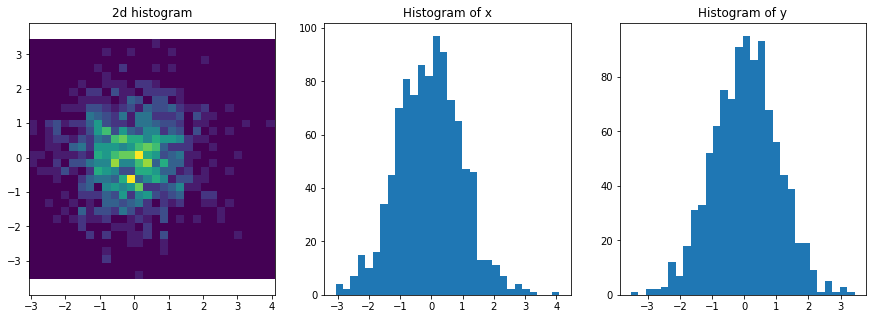

In [58]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

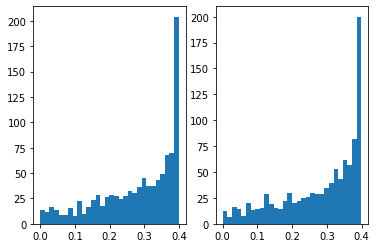

In [59]:
newx = np.sqrt(1/(2*np.pi))*np.exp(-x**2/2)
newy = np.sqrt(1/(2*np.pi))*np.exp(-y**2/2)

plt.subplot(1,2,1)
plt.hist(newx,bins = 30)
plt.subplot(1,2,2)
plt.hist(newy,bins = 30)
plt.show()

Поскольку изначально было дано не точное нормальное распределение, а только приближенное, а при подстановке значений х и у преимущественно получились равномернораспределенные случайные величины.Поэтому построенная гистограма похожа на плотность равномерного распределения на отрезке [0,sqrt(2pi)~0.4].  Следовательно, можно сделать вывод, что х и у действительно N(0,1).

Модифицированный метод:

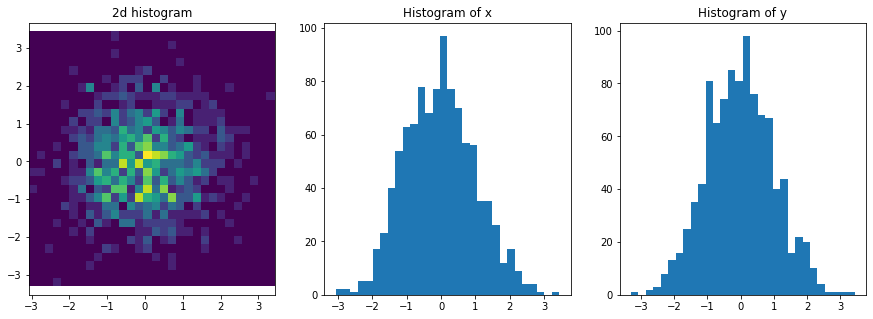

In [61]:
n=1000
i=0
u1 = np.array([])
u2 = np.array([])
while i<n:
    u,v = 2*np.random.rand(2, 1)-1
    s0=u**2+v**2
    if 0<s0<=1:
        u1 = np.append(u1,u)
        u2 = np.append(u2,v)
        i+=1
s = u1**2+u2**2
x = u1* np.sqrt((-2*np.log(s))/s)
y = u2* np.sqrt((-2*np.log(s))/s)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

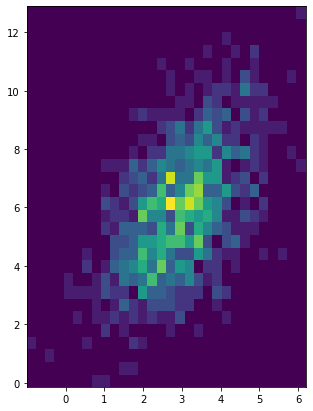

In [63]:
# ksi = a11*x+a12*y+3 
# etta = a21*x+a22*y+6
#D(ksi)=E(ksi-E(ksi))^2
#Е(a11*x+a12*y)^2=2
#E(a21*x+a22*y)^2=4
#E(a11*x+a12*y)*(a21*x+a22*y)=1
# т.к. неизвестных 4, а уравнения 3, тo положим а22=0
# E(a21*x+a22*y)^2=4 => a21^2 + a22^2 = 4, тогда a21 = 2
# E(a11*x+a12*y)*(a21*x+a22*y)=1 => a11*a21 + a12*a22 = 1 2*a11=1 => a11=1/2
#Е(a11*x+a12*y)^2=2 => a11^2+a12^2=2 a12^2=3/4 
# теперь имея коэффициенты матрицы А можем найти, как ksi и etta выражаются через х и у.

ksi = 0.5*x + math.sqrt(3)/2*y + 3 
etta = 2*x+6

plt.figure(figsize=(5,7))
plt.hist2d(ksi, etta, bins=30)
plt.show()

# Практическое задание

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [0]:
n = 100
def subsets(n):
    Bells_number = 0
    for k in range(1,100):
        Bells_number+=k**n/np.math.factorial(k)
    Bells_number*=1/np.exp(1)
    part = np.array([k**n/(np.math.factorial(k)*np.exp(1)*Bells_number) for k in range(1,101)])
    summ_p = [part[:i].sum() for i in range(1,101)]
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<summ_p[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    part = np.array([1/r for i in range(r)])
    summ_p = [part[:i].sum() for i in range(1,r+1)]
    a = np.array([np.random.rand() for i in range(n)])
    for i in range(n):
        k=0
        while k!=-1:
            if a[i]<summ_p[k]:
                c.append(k)
                k=-1
            else:
                k+=1

In [75]:
EX = 0
for i in range(10000):
    c = []
    subsets(n)
    EX+=len(np.unique(c))
EX/=10000
print(EX)

28.6034
